---
<br>

# PCA & ICA
<br>

---

### Topics to be covered:

- Use-Case Intro
    - Importing libraries
    - Loading the dataset
    - Preprocessing
      - Scaling the data

<br>

- Pre-requisite Knowledge
  - Dimensionality Reduction

<br>

- PCA
  - Analogy
  - Variance
  - How PCA works?
  - Parameters of PCA
  - PCA Implementation

<br>

- ICA
  - Intro to ICA
    - Cocktail Party Problem
  - Parameters of ICA
  - Applications of ICA
  - Advantages & Limitations of ICA
  - ICA Implementation

<br>

---

# Use-Case Intro

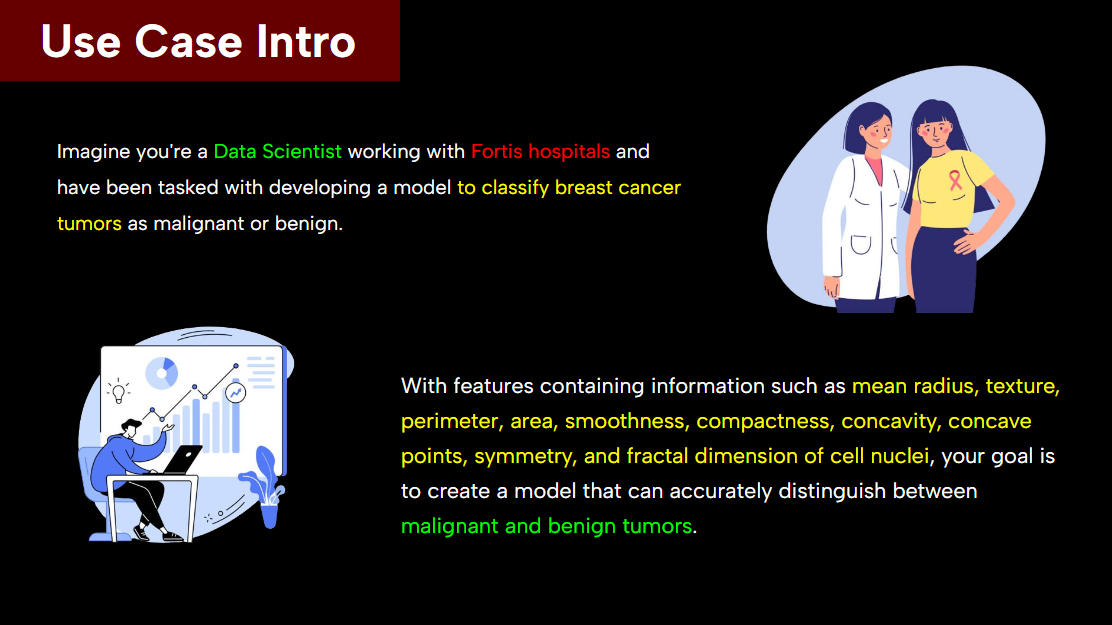

### Importing libraries




In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

### Loading the dataset

In [ ]:
!pip install -U gdown

In [ ]:
!gdown 1IyNmOaFUuPwi4BhIV0j1vrNv1Tmmmy80

Downloading...
From: https://drive.google.com/uc?id=1IyNmOaFUuPwi4BhIV0j1vrNv1Tmmmy80
To: /content/data.csv
100% 125k/125k [00:00<00:00, 81.4MB/s]


In [ ]:
df = pd.read_csv("/content/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Preprocessing

In [ ]:
df.drop(['Unnamed: 32', 'id'], axis = 1, inplace = True)

In [ ]:
X = df.iloc[:, 1:].values
y = df['diagnosis'].values

#### Scaling the data

Scaling our data is key before using these techniques. It helps make sure all features are on a similar scale. This step is important because these methods focus a lot on measuring distances. Without scaling, some features might dominate just because they are larger, which can mess up the analysis. By scaling, we treat all features fairly, leading to better and clearer results in our data visualization.

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_sc = sc.fit_transform(X)

<br>

---
---

# Pre-requisite knowledge

### Dimensionality Reduction

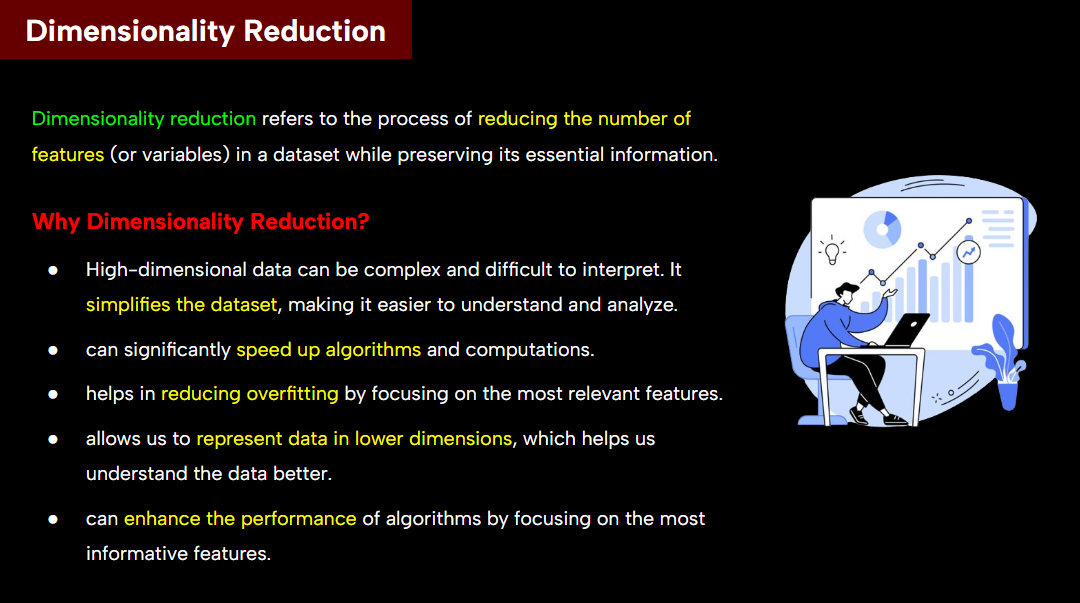

<br>

---
---

# PCA

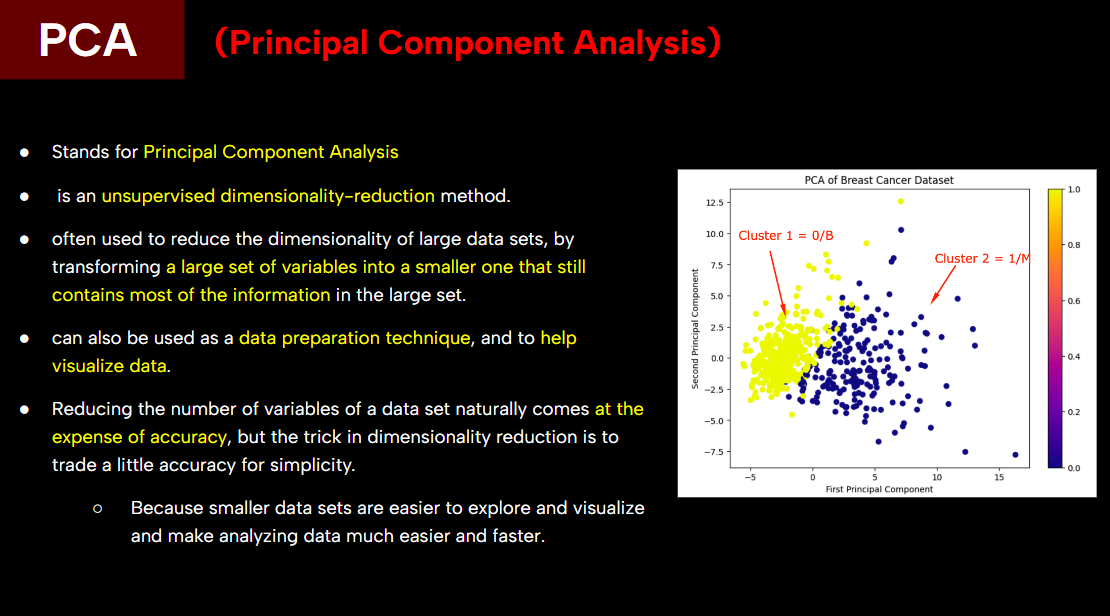

## Analogy

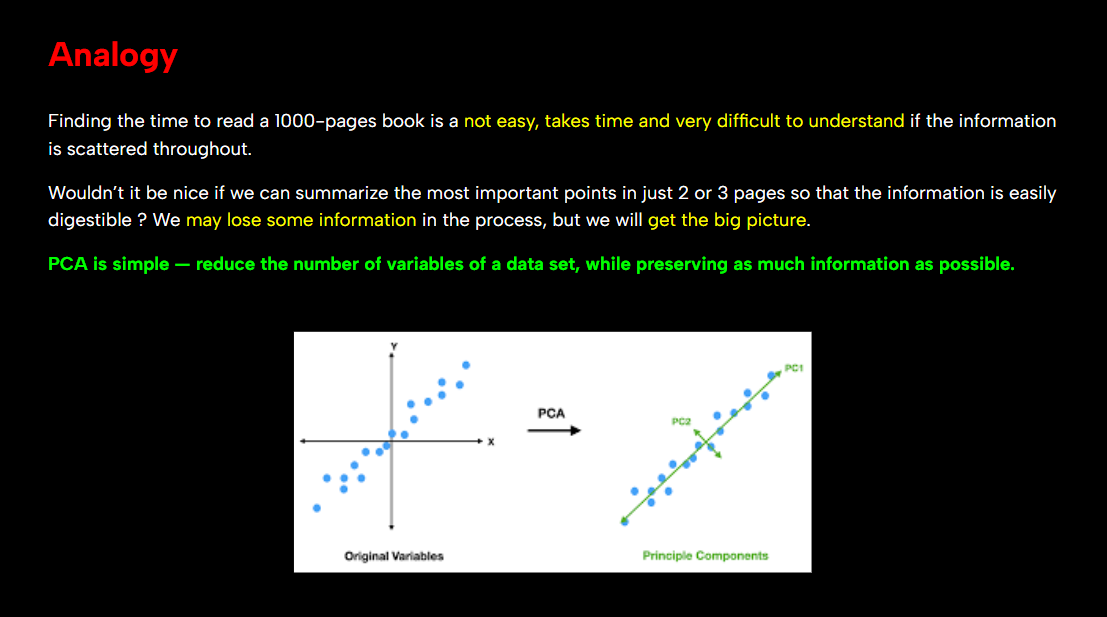

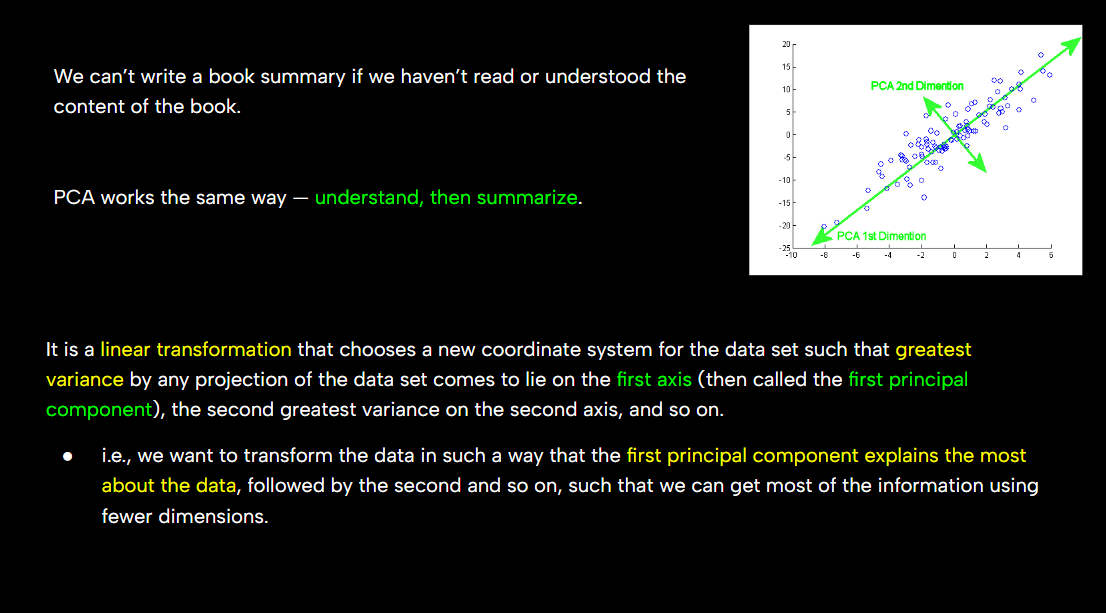

## Variance

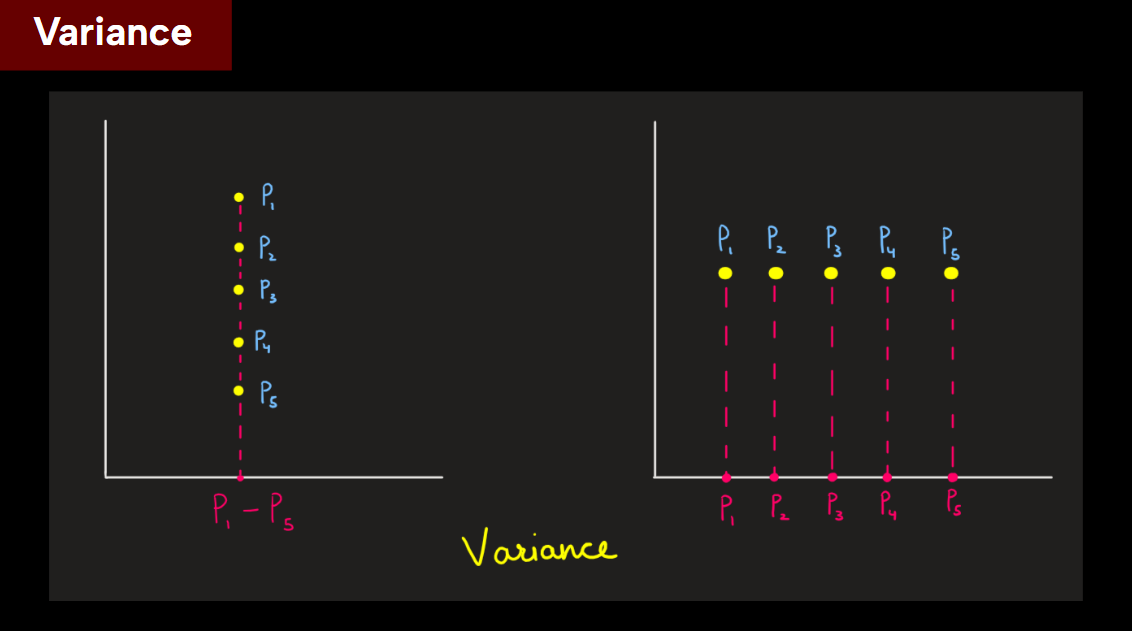

## How PCA works?


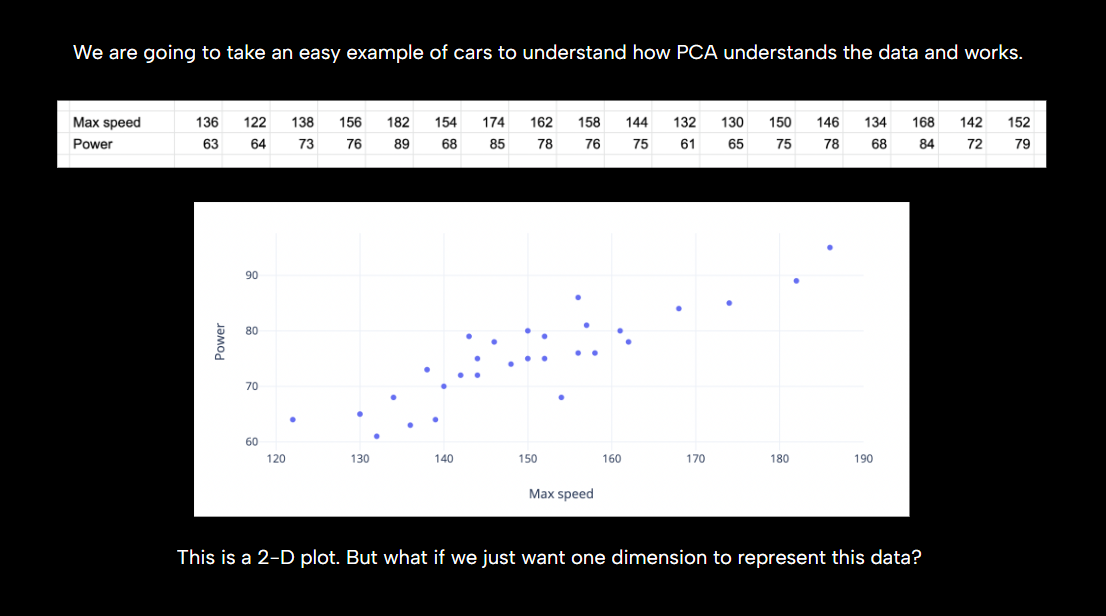

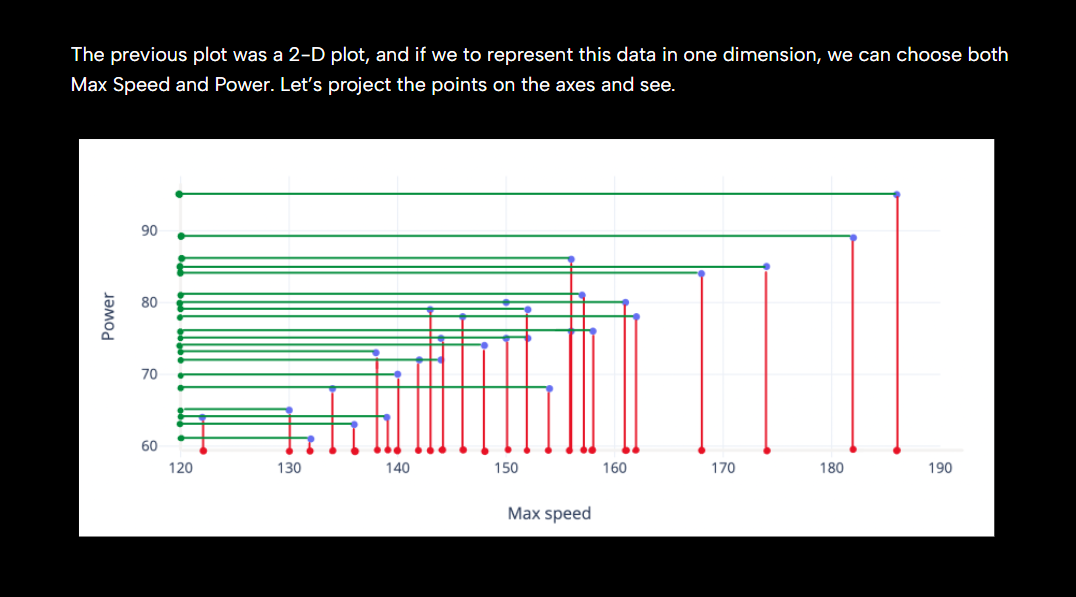

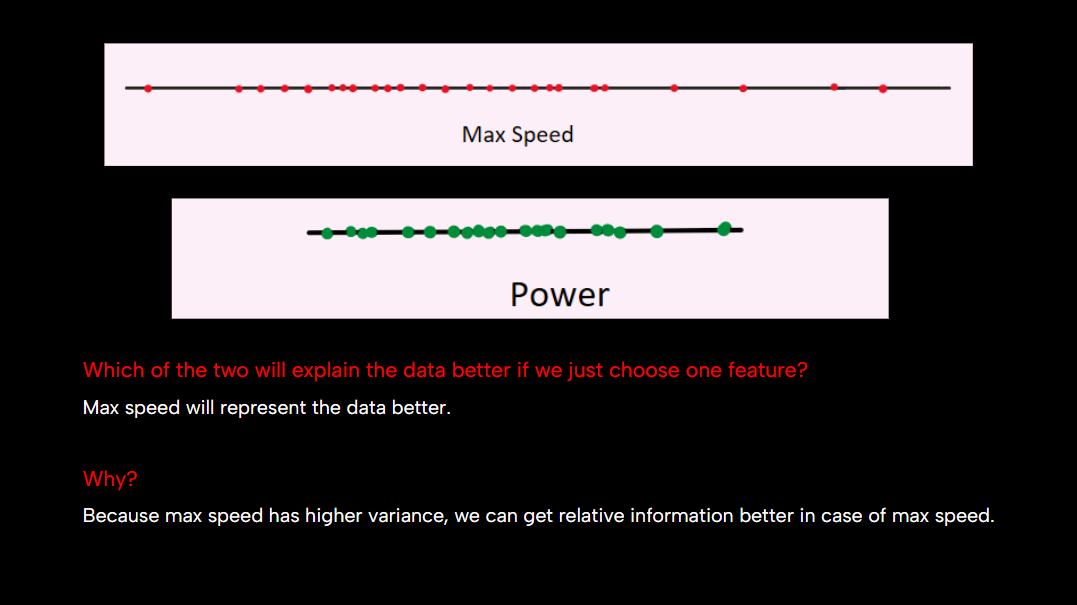

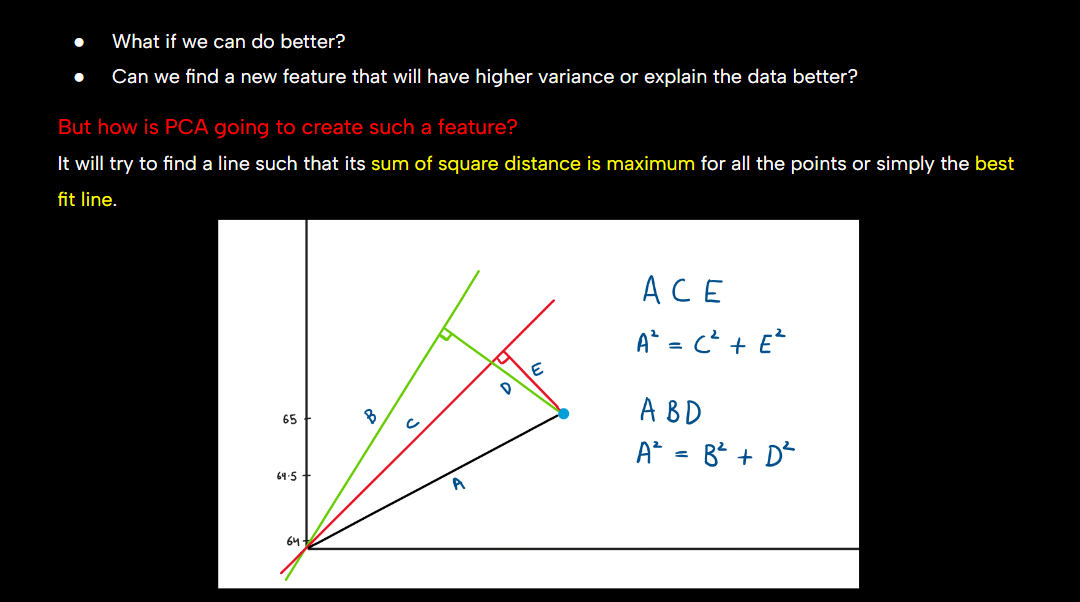

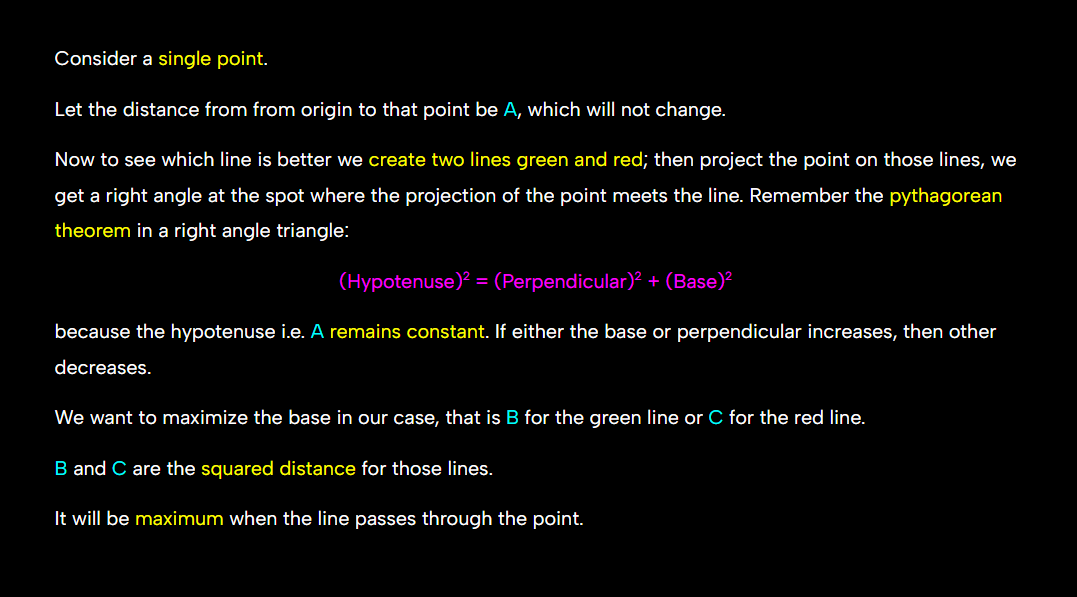

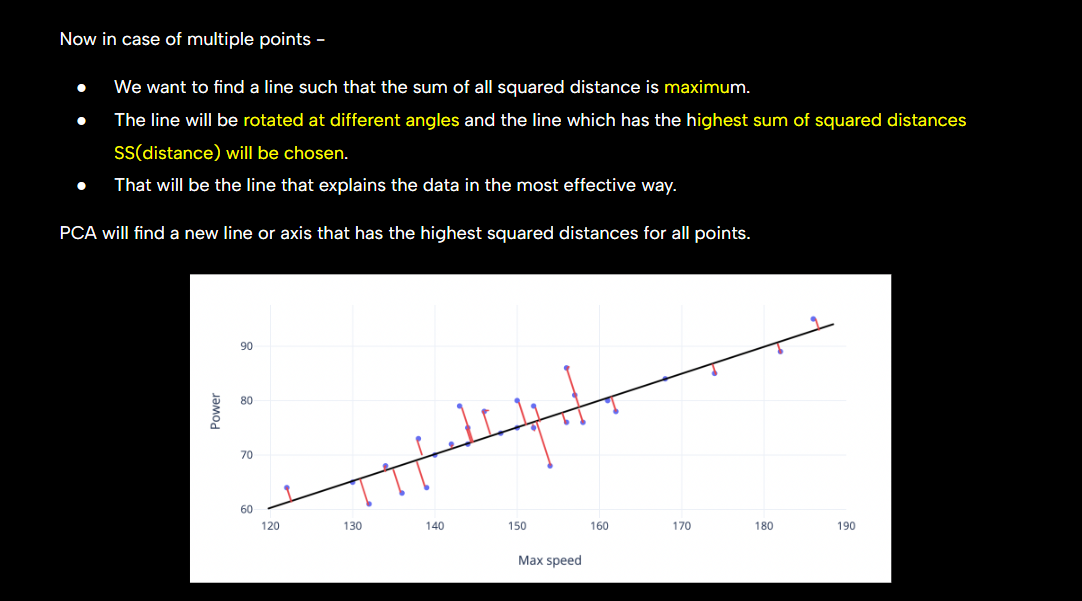

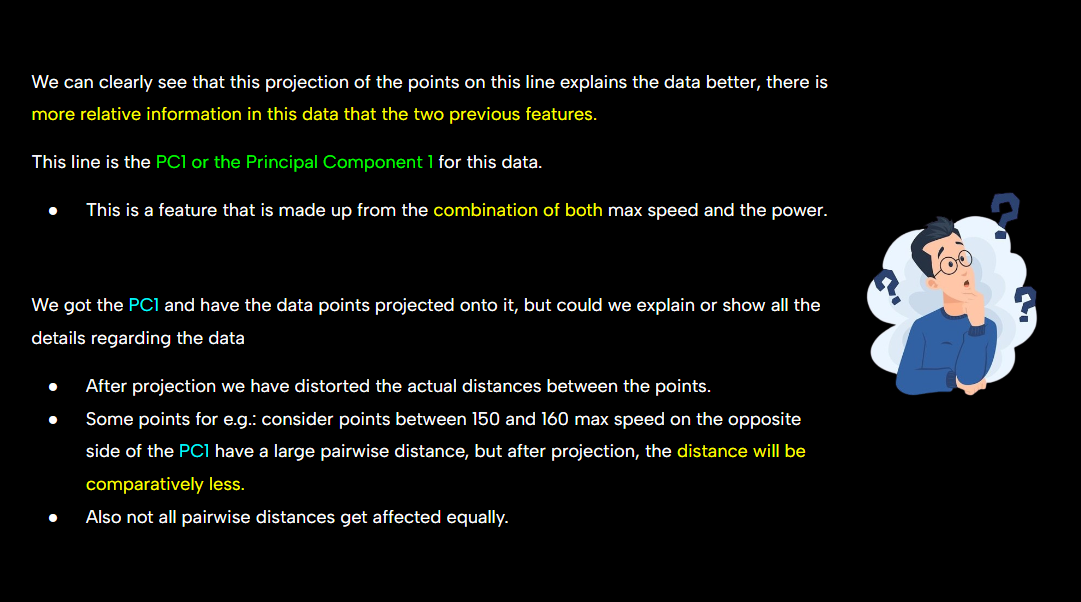

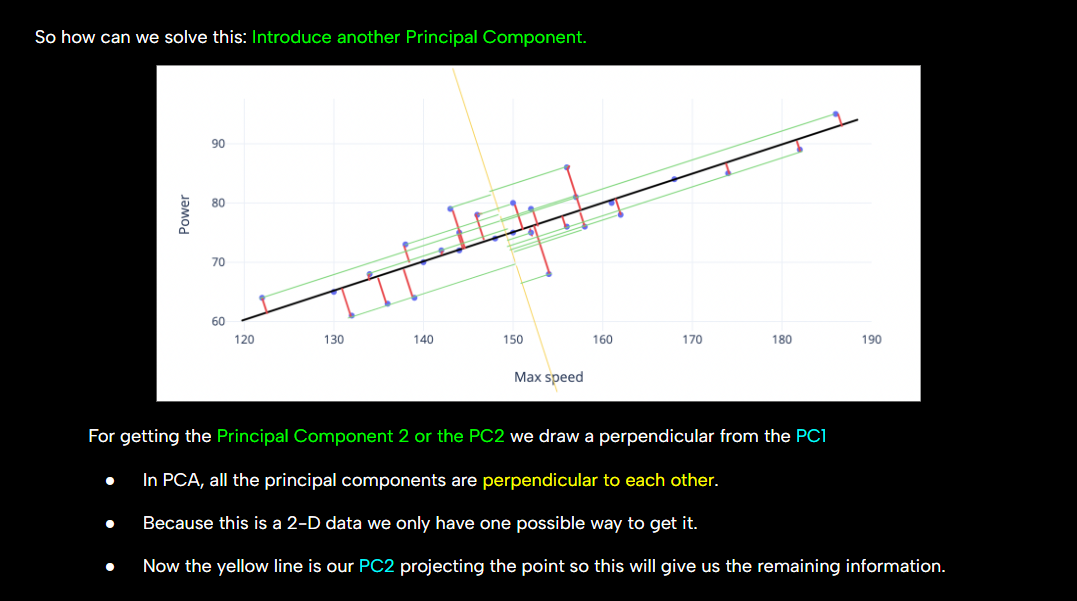

## Parameters of PCA

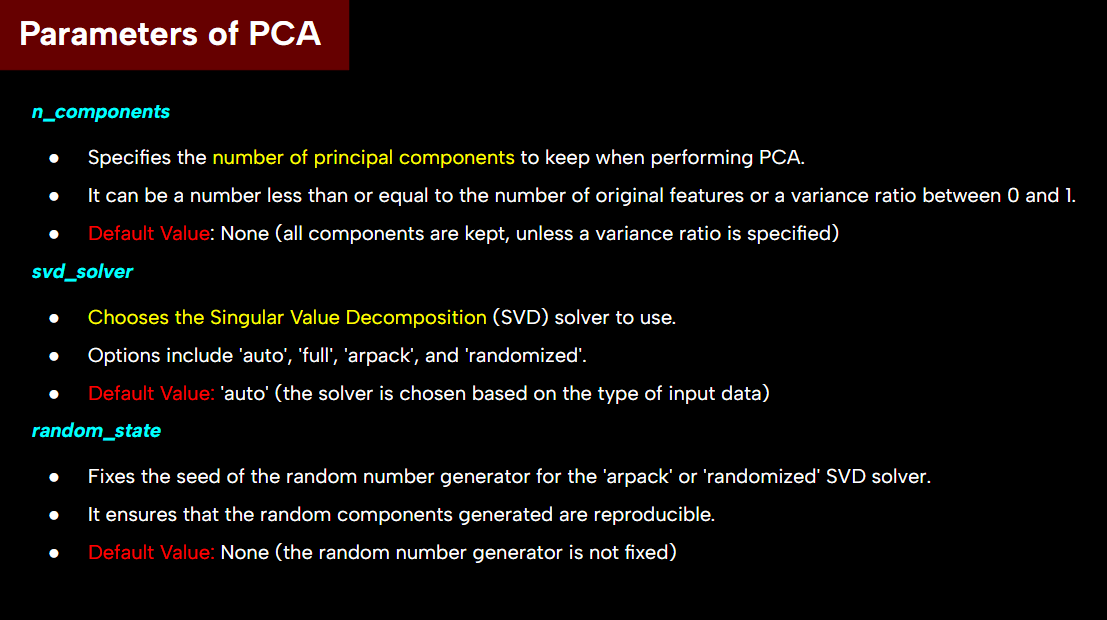

## PCA Implementation

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

In [ ]:
X_pca = pca.fit_transform(X_sc)

In [ ]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.44272026 0.18971182]


Explained Variance is the amount of variance explained by each of the selected components.

In [ ]:
df_pca=pd.DataFrame(X_pca)

In [ ]:
df_pca['y']=y
df_pca.head()

,0,1,y
0,9.192837,1.948583,M
1,2.387802,-3.768172,M
2,5.733896,-1.075174,M
3,7.122953,10.275589,M
4,3.935302,-1.948072,M


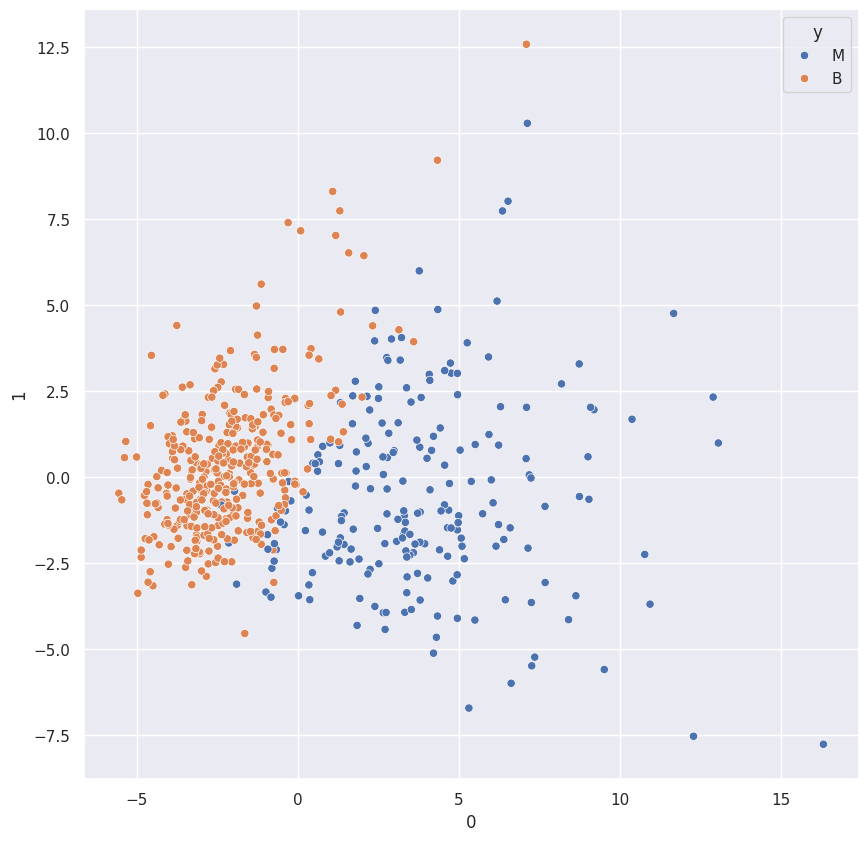

In [ ]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = 0, y = 1,hue ='y',data=df_pca)
plt.show()

<br>

---
---

# ICA

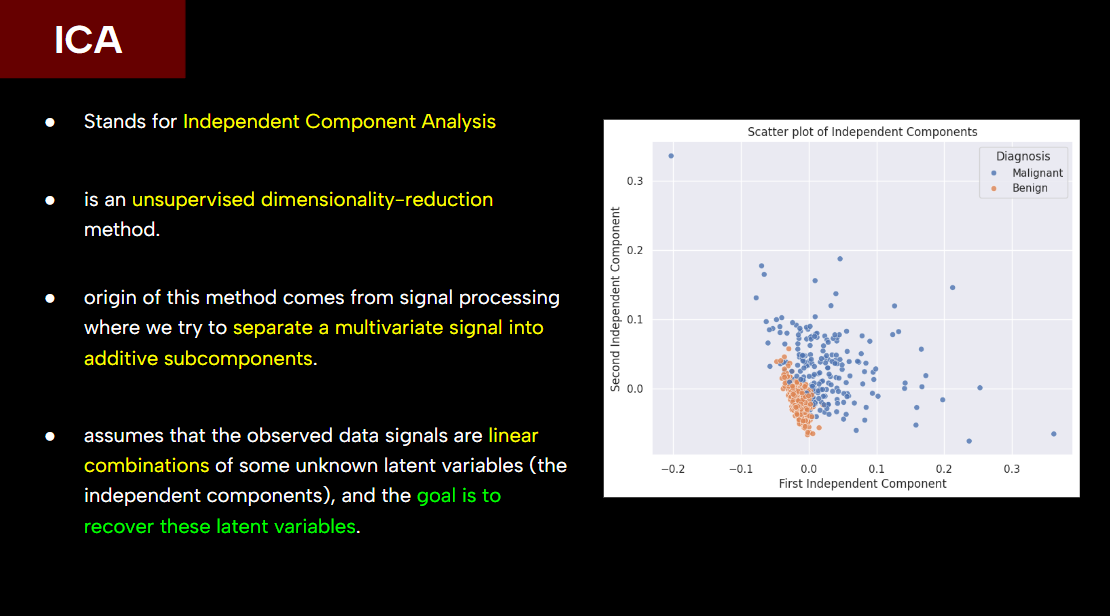

## Intro to ICA

### Cocktail Party Problem

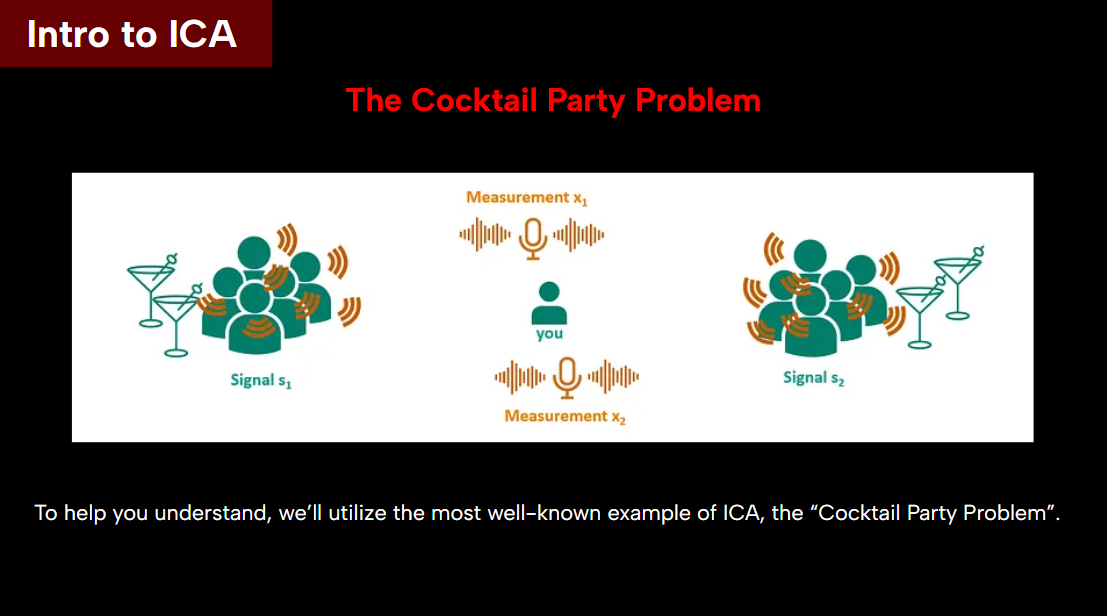

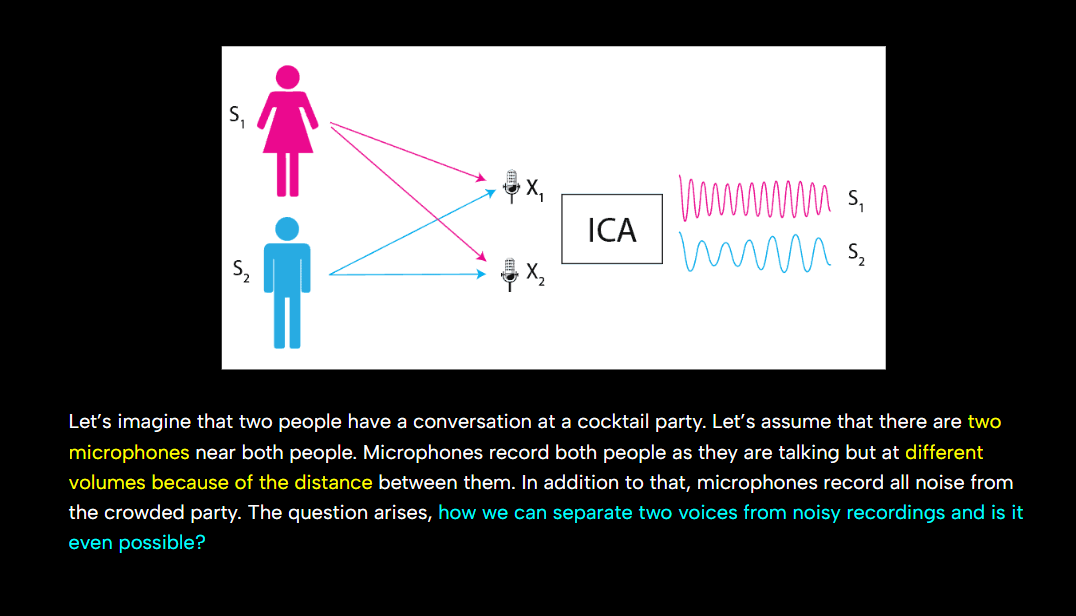

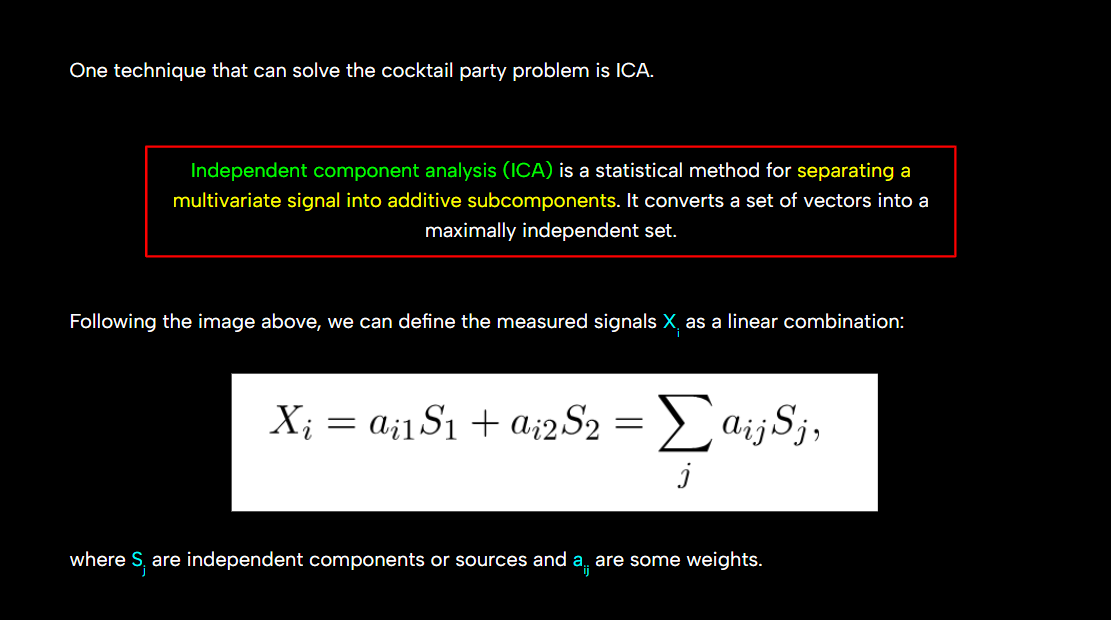

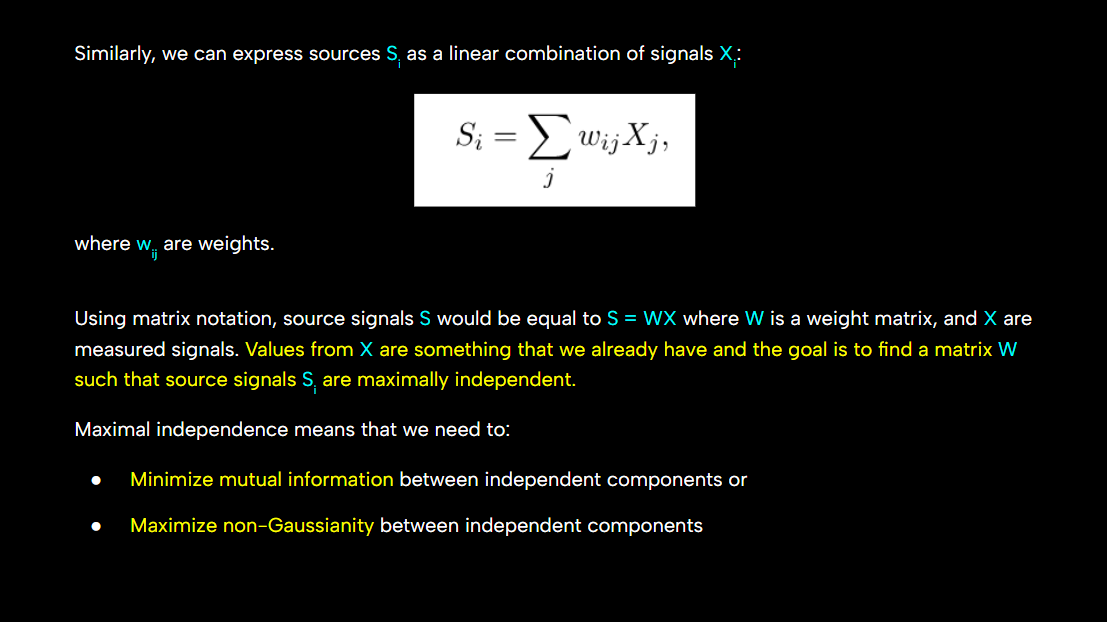

## Parameters of ICA

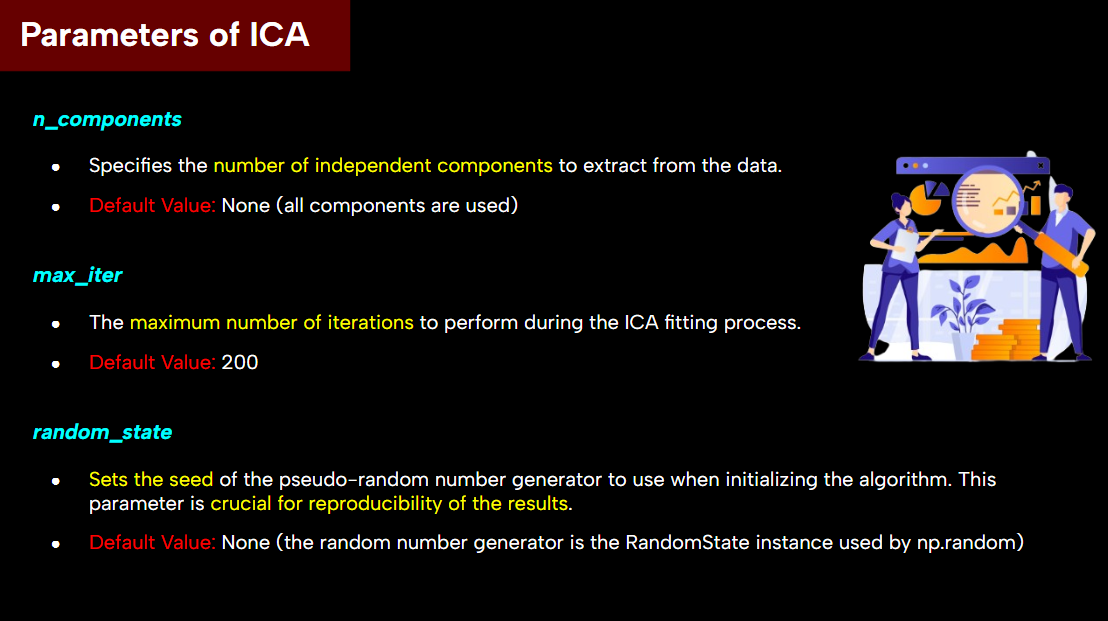

## Applications of ICA

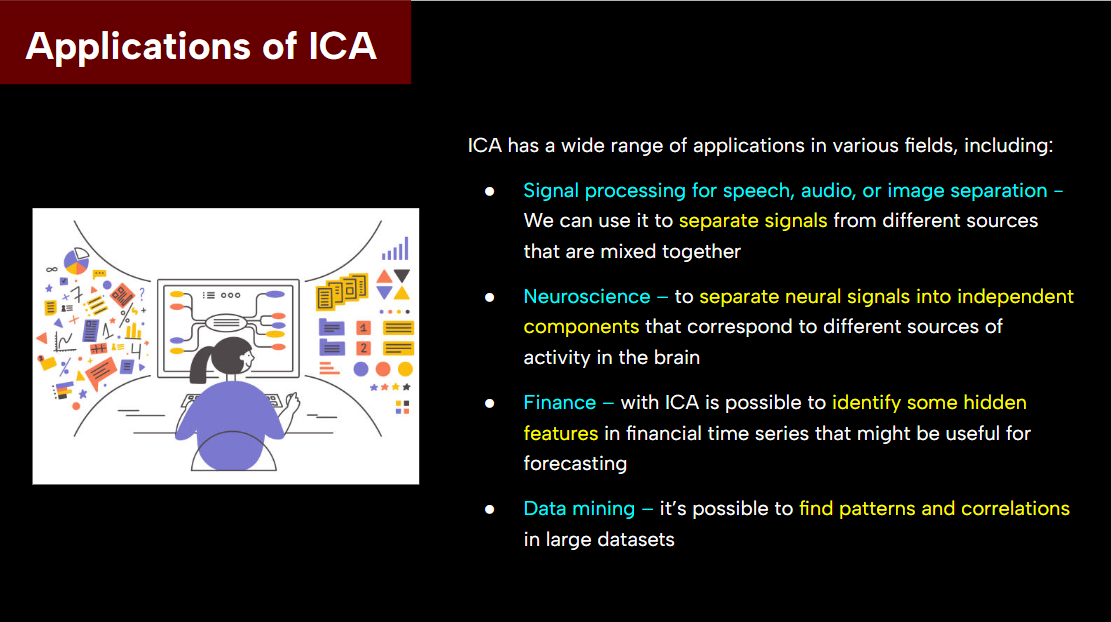

## Advantages & limitations of ICA

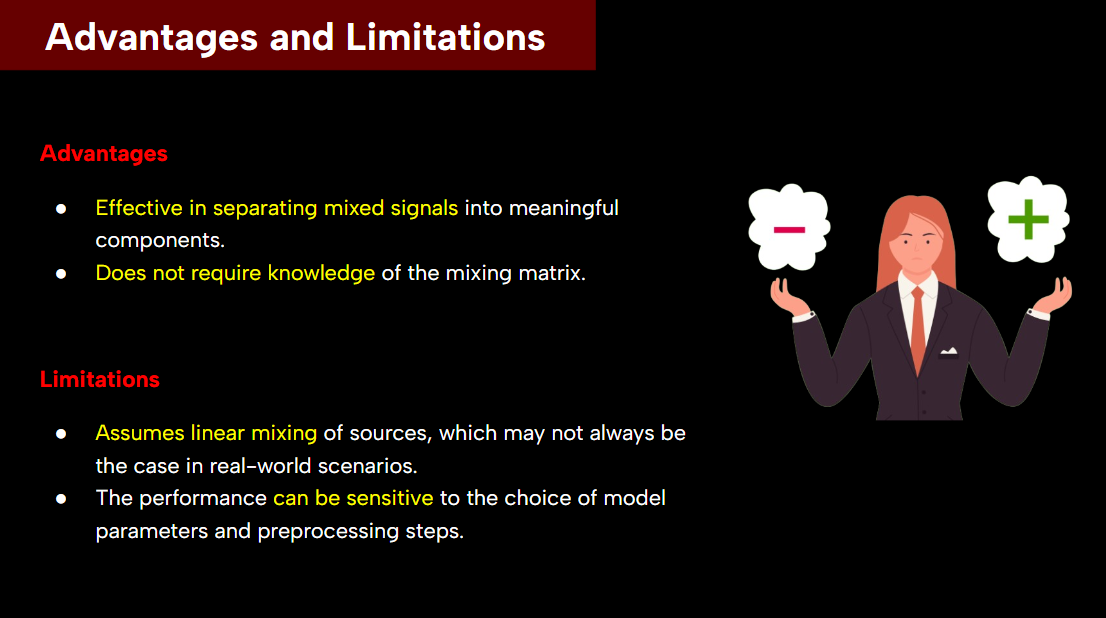

## ICA Implementation

In [ ]:
from sklearn.decomposition import FastICA

# Initialize ICA
ica = FastICA(n_components=2, random_state=0)

In [ ]:
# Fit and transform the data
X_ica = ica.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


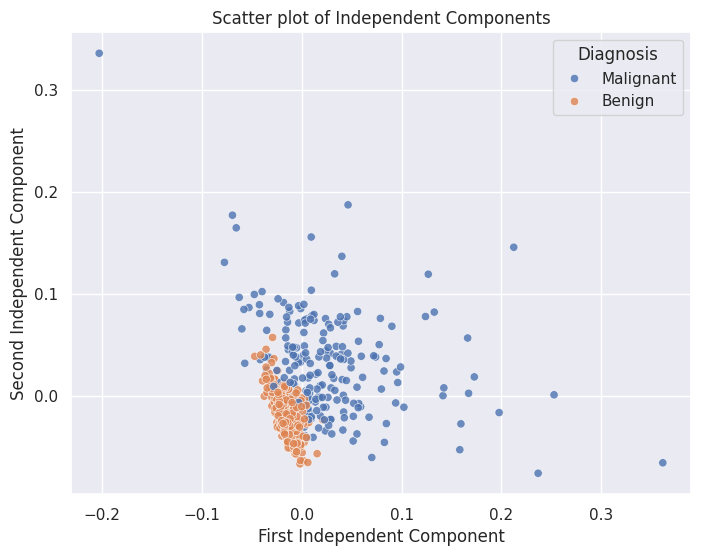

In [ ]:
plt.figure(figsize=(8, 6))

sns.scatterplot(x=X_ica[:, 0], y=X_ica[:, 1],
                hue=df['diagnosis'].map({'M': 'Malignant', 'B': 'Benign'}),
                palette='deep', alpha=0.8)

plt.xlabel('First Independent Component')
plt.ylabel('Second Independent Component')
plt.title('Scatter plot of Independent Components')
plt.legend(title='Diagnosis')
plt.show()


<br>

---
---